In this post I want to describe how to sample from a multivariate normal distribution following section [
A.2 Gaussian Identities](http://www.gaussianprocess.org/gpml/chapters/RWA.pdf) of the book [Gaussian Processes for Machine Learning](http://www.gaussianprocess.org/gpml/chapters/). This is a first step towards exploring and understanding Gaussian Process methods in machine learning. 

## Multivariate Normal Distribution 

[Recall](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) that a random vector \\(X = (X_1, \cdots, X_d)\\) has a *multivariate normal (or Gaussian) distribution* if every linear combination 

$$
\sum_{i=1}^{d} a_iX_i, \quad a_i \in \mathbb{R}
$$
is normally distributed. 

**Warning**: The sum of two normally distributed random variables does not need to be normally distributed (see below). 

The multivariate normal distribution has a joint probability density given by

$$
p(x|m,\Sigma) =(2\pi)^{−d/2}|K_0|^{−1/2}\exp􏰀\left(-\frac{1}{2}(x−m)^T {K_0}^{-1}(x−m)\right),
$$

where \\(m \in \mathbb{R}^d\\) is the *mean vector* and \\(K_0 \in M_{d}(\mathbb{R})\\) is the (symmetric, positive definite) *covariance matrix*.

## Prepare Notebook

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Set Parameters 

Let us take \\(d=2\\), 

$$
m = 
\left(
\begin{array}{c}
1 \\
2
\end{array}
\right)
$$

and 

$$
K_0 = 
\left(
\begin{array}{cc}
2 & 1 \\
1 & 2
\end{array}
\right)
$$

In [2]:
# Define dimension. 
d = 2

# Set mean vector. 
m = np.array([1, 2]).reshape(d, 1)

# Set covariance function. 
K_0 = np.array([[2, 1], 
                [1, 2]])

Let us compute the eigenvalues of \\(K_0\\).

In [3]:
# Eigenvalues covariance function.
np.linalg.eigvals(K_0)

array([3., 1.])

We see that \\(K_0\\) is indeed positive definite (see [The Spectral Theorem for Matrices](https://juanitorduz.github.io/the-spectral-theorem-for-matrices/)). 

## Sampling Process

### Step 1: Compute the Cholesky Decomposition

We want to compute the Cholesky decomposition of the covariance matrix $K_0$. That is, we want to find a lower triangular matrix \\(L\in M_d(\mathbb{R})\\) such that $K_0 = LL^T$.

*"In practice it may be necessary to add a small multiple of the identity matrix \\(\varepsilon I\\) to the covariance matrix for numerical reasons. This is because the eigenvalues of the matrix \\(K_0\\) can decay very rapidly and without this stabilization the Cholesky decomposition fails. The effect on the generated samples is to add additional independent noise of variance \\(\varepsilon \\). From the context \\(\varepsilon \\) can usually be chosen to have inconsequential effects on the samples, while ensuring numerical stability."* ([A.2 Gaussian Identities](http://www.gaussianprocess.org/gpml/chapters/RWA.pdf))

In [40]:
# Define epsilon.
epsilon = 0.0001

# Add small pertturbation. 
K = K_0 + epsilon*np.identity(d)

In [43]:
#  Cholesky decomposition.
L = np.linalg.cholesky(K)
L

array([[1.41424892, 0.        ],
       [0.7070891 , 1.2247959 ]])

Let us verify the desired property:

In [44]:
np.dot(L, np.transpose(L))

array([[2.0001, 1.    ],
       [1.    , 2.0001]])

### Step 2: Generate  Independent Samples \\(u ∼ N(0,I)\\)

In [45]:
# Number of samples. 
n = 10000

u = np.random.normal(loc=0, scale=1, size=d*n).reshape(d, n)

### Step 3: Compute \\( x = m + Lu \\)

The variable \\( x = m + Lu \\) has a multivariate normal distribution since is a linear combination of *independent* normally distributed variables. Moreover, 

$$
E[x] = E[m + Lu] = m + LE[u] = m
$$

and 

$$
E[xx^T] = E[mm^T] + E[mu^TL^T] + E[Lum^T] + E[Luu^TL^T] = ||m^2|| + LE[uu^T]L^T = ||m^2|| + K, 
$$

hence, \\(E[(x-m)(x^T-m^T)] = K\\).

In [46]:
x = m + np.dot(L, u)

## Plot Distribution

Let us plot the density function.

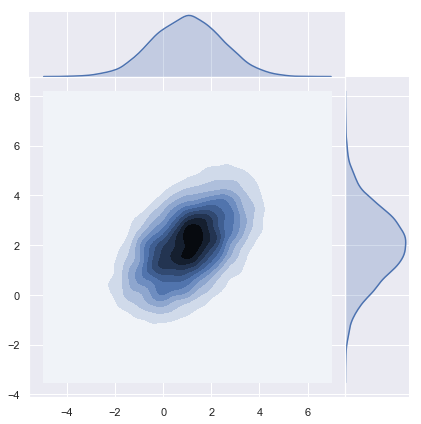

In [50]:
sns.jointplot(x=x[0],
              y=x[1], 
              kind="kde", 
              space=0);

## Using Numpy Sampler

[Numpy](https://docs.scipy.org/doc/numpy/reference/routines.random.html?highlight=random#module-numpy.random) has a build in  multivariate normal sampling function:

In [51]:
z = np.random.multivariate_normal(mean=m.reshape(d,), cov=K, size=n)

In [52]:
y = np.transpose(z)

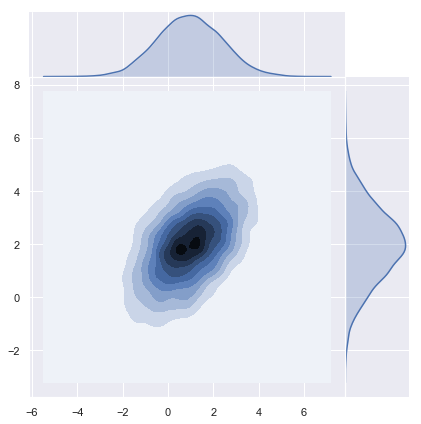

In [54]:
# Plot density function.
sns.jointplot(x=y[0],
              y=y[1], 
              kind="kde", 
              space=0);

---

## Sums of Normal Random Variables need not be Normal

As an important remark, note that sums of normal random variables need not be normal. Let us see a concrete example studied in detail [here](https://planetmath.org/sumsofnormalrandomvariablesneednotbenormal). Let $Z_1 \sim N(0,1)$ and define \\(Z_2 := \text{sign}(Z_1)Z_1\\). Then, \\(Z_1 + Z_2\\) is not normally distributed. 

In [55]:
z_1 = np.random.normal(loc=0, scale=1, size=n)
z = np.random.normal(loc=0, scale=1, size=n)

In [56]:
z_2 = np.sign(z)*z_1

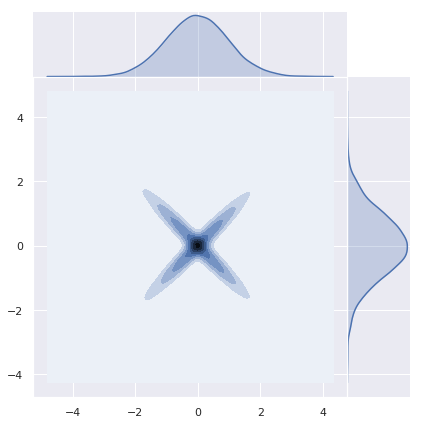

In [17]:
sns.jointplot(x=z_1,
              y=z_2, 
              kind="kde", 
              space=0);